In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h4>KPI-1 Penetracion de internet cada 100 hogares por trimestre</h4>

In [2]:
dt = pd.read_csv('datasets/Internet_PenetracionPROV.csv')
dt.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,"78,11"
1,2022,3,Capital Federal,"122,28"
2,2022,3,Catamarca,"65,33"
3,2022,3,Chaco,"43,86"
4,2022,3,Chubut,"84,38"


In [9]:
print(dt.dtypes,'\n',dt.shape)

Año                              int64
Trimestre                        int64
Provincia                       object
Accesos por cada 100 hogares    object
dtype: object 
 (840, 4)


In [16]:
dt['Accesos por cada 100 hogares'] = [x.replace(',', '.') for x in dt['Accesos por cada 100 hogares']]
dt.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,78.11
1,2022,3,Capital Federal,122.28
2,2022,3,Catamarca,65.33
3,2022,3,Chaco,43.86
4,2022,3,Chubut,84.38


In [17]:
dt['Accesos por cada 100 hogares'] = dt['Accesos por cada 100 hogares'].astype('float64')
dt.dtypes

Año                               int64
Trimestre                         int64
Provincia                        object
Accesos por cada 100 hogares    float64
dtype: object

In [10]:
dt[dt.duplicated()]

,Año,Trimestre,Provincia,Accesos por cada 100 hogares


In [11]:
dt.isnull().sum()

Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64

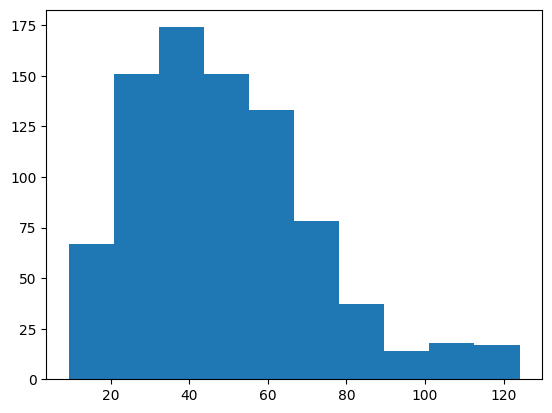

In [22]:
plt.hist(dt['Accesos por cada 100 hogares'])
plt.show()

In [130]:
def MeanGrowthPerProv():
    x = dt['Accesos por cada 100 hogares'].groupby(dt['Provincia']).mean().sort_values().index
    y = dt['Accesos por cada 100 hogares'].groupby(dt['Provincia']).mean().sort_values().values
    plt.title('Mean Access Per Prov')
    plt.barh(x, y)
    plt.show()

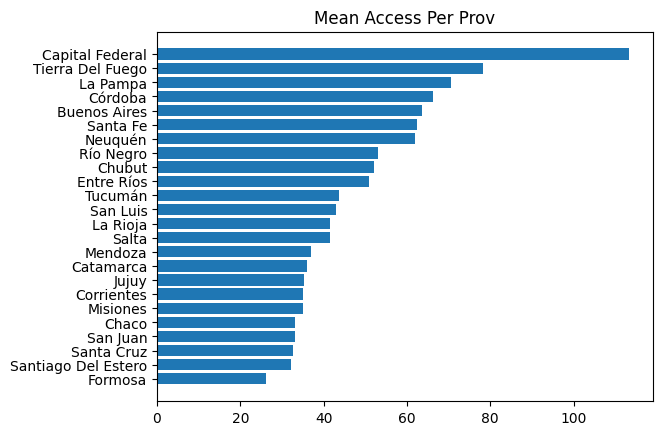

In [131]:
MeanGrowthPerProv()

In [123]:
def MeanGrowthPerYear(provincia):
    x = dt['Accesos por cada 100 hogares'].where(dt['Provincia'] == provincia).groupby(dt['Año']).mean().index
    y = dt['Accesos por cada 100 hogares'].where(dt['Provincia'] == provincia).groupby(dt['Año']).mean().values
    plt.title(f'Mean Growth {provincia}')
    plt.plot(x, y)
    plt.show()

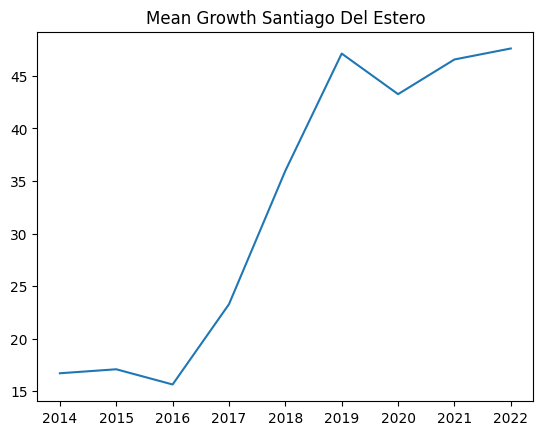

In [124]:
MeanGrowthPerYear('Santiago Del Estero')

In [139]:
dt.to_csv('datasets/KPI_1_Internet_PenetracionPROV.csv', index=False)


<h4>KPI-2 Velocidad media por provincia y trimestre</h4>

In [4]:
dt = pd.read_csv('datasets/historico_velocidad_internetPROV.csv')
dt.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada),Unnamed: 4,Unnamed: 5
0,2022,3,Buenos Aires,70,NaN,NaN
1,2022,3,Capital Federal,101,NaN,NaN
2,2022,3,Catamarca,61,NaN,NaN
3,2022,3,Chaco,53,NaN,NaN
4,2022,3,Chubut,16,NaN,NaN


In [5]:
print(dt.dtypes, dt.shape)

Año                         int64
Trimestre                   int64
Provincia                  object
Mbps (Media de bajada)      int64
Unnamed: 4                float64
Unnamed: 5                float64
dtype: object (840, 6)


In [6]:
dt = dt.drop(columns=['Unnamed: 4', 'Unnamed: 5'])
dt.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,3,Buenos Aires,70
1,2022,3,Capital Federal,101
2,2022,3,Catamarca,61
3,2022,3,Chaco,53
4,2022,3,Chubut,16


In [32]:
def meanSpeedPerProv(anio):
    dtgp = dt.where(dt['Año'] == anio).groupby('Provincia').mean().sort_values(by='Mbps (Media de bajada)')
    plt.barh(dtgp.index, dtgp['Mbps (Media de bajada)'])
    plt.show()

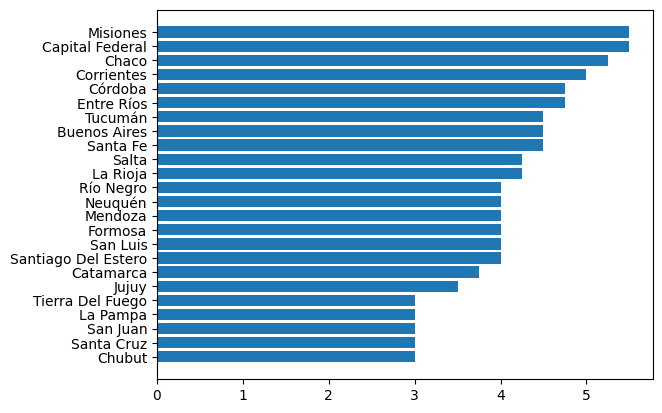

In [36]:
meanSpeedPerProv(2015)

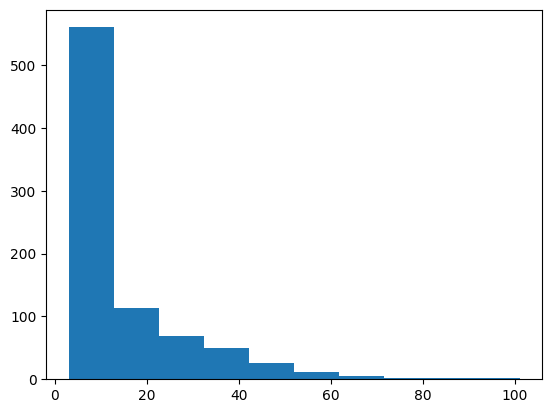

In [38]:
plt.hist(dt['Mbps (Media de bajada)'])
plt.show()

In [39]:
dt.to_csv('datasets/KPI_2_historico_velocidad_internetPROV.csv', index=False)

<h4>KPI-3 Acceso fijo por tecnologia</h4>

In [7]:
dt = pd.read_csv('datasets/Internet_Accesos-por-tecnologiaPROV.csv')
dt.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,3,Buenos Aires,339.648,2.748.325,1.436.433,126.846,70.416,4.721.668
1,2022,3,Capital Federal,140.791,1.240.125,129.218,5.758,31.787,1.547.679
2,2022,3,Catamarca,10.010,10.495,46.224,1.329,2.235,70.293
3,2022,3,Chaco,27.164,61.800,44.645,8.178,2.359,144.146
4,2022,3,Chubut,45.377,72.212,9.574,29.784,8.831,165.778


In [8]:
print(dt.dtypes, dt.shape)

Año              object
Trimestre        object
Provincia        object
ADSL             object
Cablemodem       object
Fibra óptica     object
Wireless        float64
Otros           float64
Total            object
dtype: object (841, 9)


In [9]:
dt.isnull().sum()

Año             0
Trimestre       0
Provincia       1
ADSL            1
Cablemodem      1
Fibra óptica    1
Wireless        1
Otros           1
Total           1
dtype: int64

In [10]:
dt = dt.dropna()

In [11]:
dt.dtypes

Año              object
Trimestre        object
Provincia        object
ADSL             object
Cablemodem       object
Fibra óptica     object
Wireless        float64
Otros           float64
Total            object
dtype: object

In [12]:
dt = dt.astype('string')

In [13]:
col = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']
for atrr in col:
    dt[atrr] = [x.replace('.', '') for x in dt[atrr]]
dt.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,3,Buenos Aires,339648,2748325,1436433,126846,70416,4721668
1,2022,3,Capital Federal,140791,1240125,129218,5758,31787,1547679
2,2022,3,Catamarca,10010,10495,46224,1329,2235,70293
3,2022,3,Chaco,27164,61800,44645,8178,2359,144146
4,2022,3,Chubut,45377,72212,9574,29784,8831,165778


In [14]:
dt = dt.drop(dt[dt['Año'] == '2019 *'].index)
dt.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,3,Buenos Aires,339648,2748325,1436433,126846,70416,4721668
1,2022,3,Capital Federal,140791,1240125,129218,5758,31787,1547679
2,2022,3,Catamarca,10010,10495,46224,1329,2235,70293
3,2022,3,Chaco,27164,61800,44645,8178,2359,144146
4,2022,3,Chubut,45377,72212,9574,29784,8831,165778


In [15]:
col = {'Año':'int64','Trimestre':'int32','ADSL':'int64','Cablemodem':'int64','Fibra óptica':'int64','Wireless':'int64','Otros':'int64','Total':'int64'}
dt = dt.astype(col)

In [16]:
dt.dtypes

Año              int64
Trimestre        int32
Provincia       string
ADSL             int64
Cablemodem       int64
Fibra óptica     int64
Wireless         int64
Otros            int64
Total            int64
dtype: object

In [28]:
dt['ADSL'].where(dt['Año']==2022).sum()

4396850.0

In [43]:
c = dt[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].where((dt['Año']==2022) & (dt['Trimestre']==3)).sum(skipna=True)

In [45]:
def accessAmountPerTecnology(anio, trimestre):
    suma = dt[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].where((dt['Año']==2022) & (dt['Trimestre']==3)).sum(skipna=True)
    plt.title(f'Cantidad de accesos por tecnologia {anio} trim {trimestre}')
    plt.bar(['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros'], suma )
    plt.show

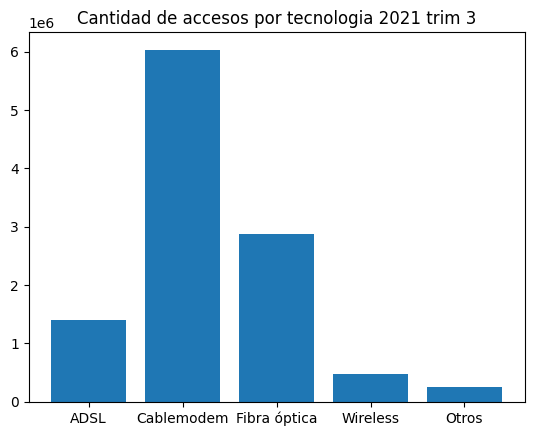

In [46]:
accessAmountPerTecnology(2021,3)

In [47]:
dt.to_csv('datasets/KPI_3_Internet_Accesos-por-tecnologiaPROV.csv', index=False)

<h4>KPI-4 Ingresos</h4>

In [48]:
rev = pd.read_csv('datasets/Internet_IngresosTRIM.csv')
rev.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,3,67.055.930,Jul-Sept 2022
1,2022,2,60.335.724,Abr-Jun 2022
2,2022,1,55.589.997,Ene-Mar 2022
3,2021,4,45.467.887,Oct-Dic 2021
4,2021,3,42.999.944,Jul-Sept 2021


In [78]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Año                        35 non-null     int64 
 1   Trimestre                  35 non-null     int64 
 2   Ingresos (miles de pesos)  35 non-null     object
 3   Periodo                    35 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


In [63]:
usdcot = pd.read_csv('datasets/DOLAR MAYORISTA - Cotizaciones historicas.csv', usecols=['maximo','fecha'])
usdcot.head()

,maximo,fecha
0,41.25,2018-09-28
1,39.60,2018-10-01
2,38.10,2018-10-02
3,37.69,2018-10-03
4,38.30,2018-10-04


In [64]:
usdcot['fecha'] = pd.to_datetime(usdcot['fecha'])

In [65]:
usdcot.head()

,maximo,fecha
0,41.25,2018-09-28
1,39.60,2018-10-01
2,38.10,2018-10-02
3,37.69,2018-10-03
4,38.30,2018-10-04


In [66]:
usdcot['years'] = usdcot['fecha'].dt.year

In [ ]:
usdcot['years'] = usdcot['fecha'].dt.to_period()

In [68]:
usdcot.head(15)

,maximo,fecha,years
0,41.25,2018-09-28,2018
1,39.60,2018-10-01,2018
2,38.10,2018-10-02,2018
3,37.69,2018-10-03,2018
4,38.30,2018-10-04,2018
5,37.84,2018-10-05,2018
6,37.42,2018-10-08,2018
7,37.12,2018-10-09,2018
8,37.25,2018-10-10,2018
9,36.57,2018-10-11,2018


In [74]:
usdcot = usdcot['maximo'].groupby(usdcot['years']).mean()

In [75]:
usdcot.head()

years
2018     37.173217
2019     48.234728
2020     70.582796
2021     94.773568
2022    131.257940
Name: maximo, dtype: float64

In [79]:
usdcot.to_csv('datasets/DOLAR MAYORISTA - Cotizaciones historicas.csv', index=False)